In [1]:
#------------------------------------------------------------------------------------------------------#
# Library Imports
#------------------------------------------------------------------------------------------------------#
## Stats Lib Imports
from scipy.stats import norm
import numpy as np

## Plotting Lib Imports
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl
#------------------------------------------------------------------------------------------------------#

In [5]:
# Positive distributions
## Determining the x-value for normal distribution N(mu, sigma) from percentage value
z_mu = 22.89588398			# mean
z_sigma = 1.232494246		# standard deviation or sqrt(variance)
z_fallout = 2.53/100
z = norm(loc=z_mu, scale=z_sigma)
z_xval = z.ppf(z_fallout)	 # probability point function
print(z_xval)                # x-value
print((z.cdf(z_xval))*100)   # P-value via Cumulative Density Function
## Using prior determined x-value to determine percentage under a new normal distr
y_mu = 21.8132243                
y_sigma = 3.40038846                
y = norm(loc=y_mu, scale=y_sigma)
y_fallout=y.cdf(z_xval)*100
print((y.cdf(z_xval))*100)

20.4865344859
2.53
34.8209743766


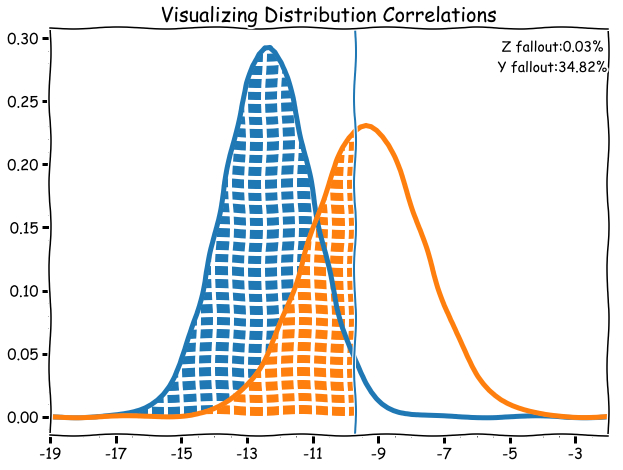

In [10]:
# All the rest of this is just for formatting the visualization...yah :\
fig,ax=plt.subplots() # returns a tuple containing a figure and axes object(s)
fig.set_size_inches(10, 7.5, forward=True)
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

x = np.linspace(round(min(z_mu-5*z_sigma, y_mu-4*y_sigma)), round(max(z_mu+5*z_sigma, y_mu+4*y_sigma)), 100)
ax.set_xlim([round(min(z_mu-5*z_sigma, y_mu-4*y_sigma)), round(max(z_mu+5*z_sigma, y_mu+4*y_sigma))])
stepsize = 2
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, stepsize))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

# the actual plotting
plt.xkcd()
plt.title('Visualizing Distribution Correlations', fontsize=20)
plt.plot(x,mlab.normpdf(x,z_mu,z_sigma), linewidth=5)
plt.plot(x,mlab.normpdf(x,y_mu,y_sigma), linewidth=5)
plt.axvline(z_xval)

section=np.arange(z_mu-3*z_sigma, z_xval, 1/20)
plt.fill_between(section, mlab.normpdf(section, z_mu, z_sigma))

section=np.arange(y_mu-3*y_sigma, z_xval, 1/20)
plt.fill_between(section, mlab.normpdf(section, y_mu, y_sigma))

plt.text(0.9, 0.95, 'Z fallout:'+str(round(z_fallout,2))+'%', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
plt.text(0.9, 0.90, 'Y fallout:'+str(round(y_fallout,2))+'%', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)


In [11]:
# Negative distributions
## Determining the x-value for normal distribution N(mu, sigma) from percentage value
z_mu = -12.36627301
z_sigma = 1.358542628
z_fallout = 2.51/100
z = norm(loc=z_mu, scale=z_sigma)
z_xval = z.ppf(1-z_fallout)
print(z_xval)
print((1-z.cdf(z_xval))*100)
## Using prior determined x-value to determine percentage under a new normal distr
y_mu = -9.36638000     
y_sigma = 1.72321480            
y = norm(loc=y_mu, scale=y_sigma)
y_fallout=y.cdf(z_xval)*100
print((1-y.cdf(z_xval))*100)

-9.70589897762
2.51
57.8096599165


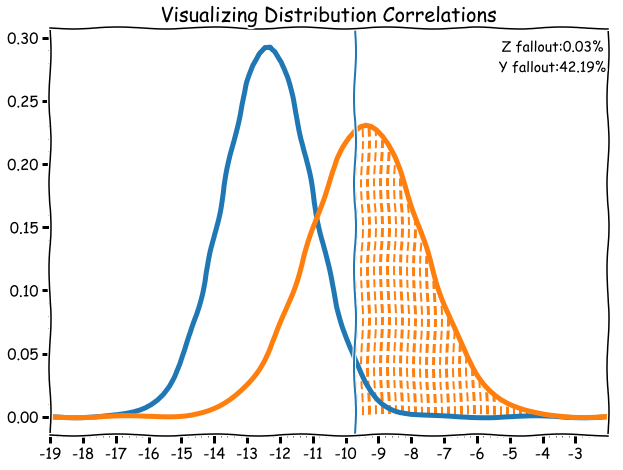

In [12]:
# All the rest of this is just for formatting the visualization...yah :\
fig,ax=plt.subplots() # returns a tuple containing a figure and axes object(s)
fig.set_size_inches(10, 7.5, forward=True)
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

x = np.linspace(round(min(z_mu-5*z_sigma, y_mu-4*y_sigma)), round(max(z_mu+5*z_sigma, y_mu+4*y_sigma)), 100)
ax.set_xlim([round(min(z_mu-5*z_sigma, y_mu-4*y_sigma)), round(max(z_mu+5*z_sigma, y_mu+4*y_sigma))])
stepsize = 1
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, stepsize))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

# the actual plotting
plt.xkcd()
plt.title('Visualizing Distribution Correlations', fontsize=20)
plt.plot(x,mlab.normpdf(x,z_mu,z_sigma), linewidth=5)
plt.plot(x,mlab.normpdf(x,y_mu,y_sigma), linewidth=5)
plt.axvline(z_xval)

section=np.arange(z_xval, z_mu+3*z_sigma, 1/20)
plt.fill_between(section, mlab.normpdf(section, z_mu, z_sigma))

section=np.arange(z_xval, y_mu+3*y_sigma, 1/20)
plt.fill_between(section, mlab.normpdf(section, y_mu, y_sigma))

plt.text(0.9, 0.95, 'Z fallout:'+str(round(z_fallout,2))+'%', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
plt.text(0.9, 0.90, 'Y fallout:'+str(round(y_fallout,2))+'%', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

In [17]:
%%bash 
pwd

/home/kross/ipython/notebooks
